# Análisis exploratorio completo
1. Analizando el Vino
2. Modelo y evaluación
3. Siguientes pasos

In [24]:
import pandas as pd
import seaborn as sns
from scipy.stats import skew 
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

url_wine_red='https://raw.githubusercontent.com/terranigmark/curso-analisis-exploratorio-datos-platzi/main/winequality-red.csv'

url_wine_white='https://raw.githubusercontent.com/terranigmark/curso-analisis-exploratorio-datos-platzi/main/winequality-white.csv'

In [4]:
red=pd.read_csv(url_wine_red,delimiter=";")
white=pd.read_csv(url_wine_white,delimiter=";")
white.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


## Union de los DataSets

In [5]:
red['category']='red'
white['category']='white'
total_wine=red.append(white, ignore_index=True)
total_wine.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
category                 object
dtype: object

## Describiendo los datos

In [7]:
total_wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


## Graficas

### Todas las variables
Averiguando cual variable se esta disparando mas hacia arriba.

<AxesSubplot:>

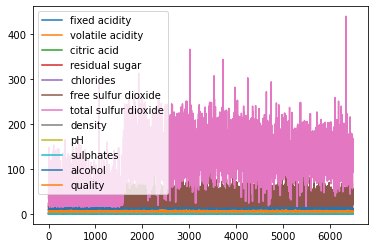

In [8]:
total_wine.plot()

### Densidad
En la Densidad del vino esta presesntando un gran valor atipicos.

<AxesSubplot:>

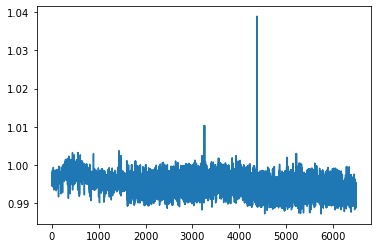

In [9]:
total_wine['density'].plot()

### Calidad de los vinos
Hipotesis: La calidad de los vinos se deberan de separar solo en tres calidades.

/home/oscar/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='quality', ylabel='count'>

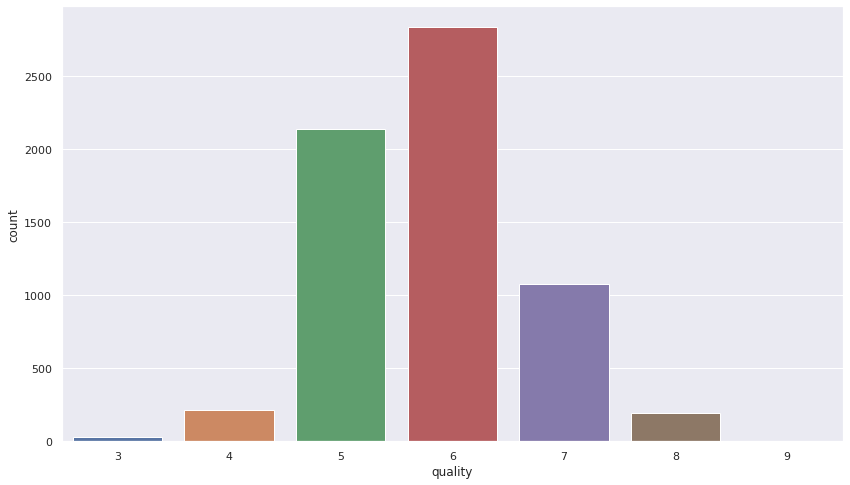

In [13]:
sns.set(rc={'figure.figsize': (14, 8)})
sns.countplot(total_wine['quality'])

### Observando correlaciones

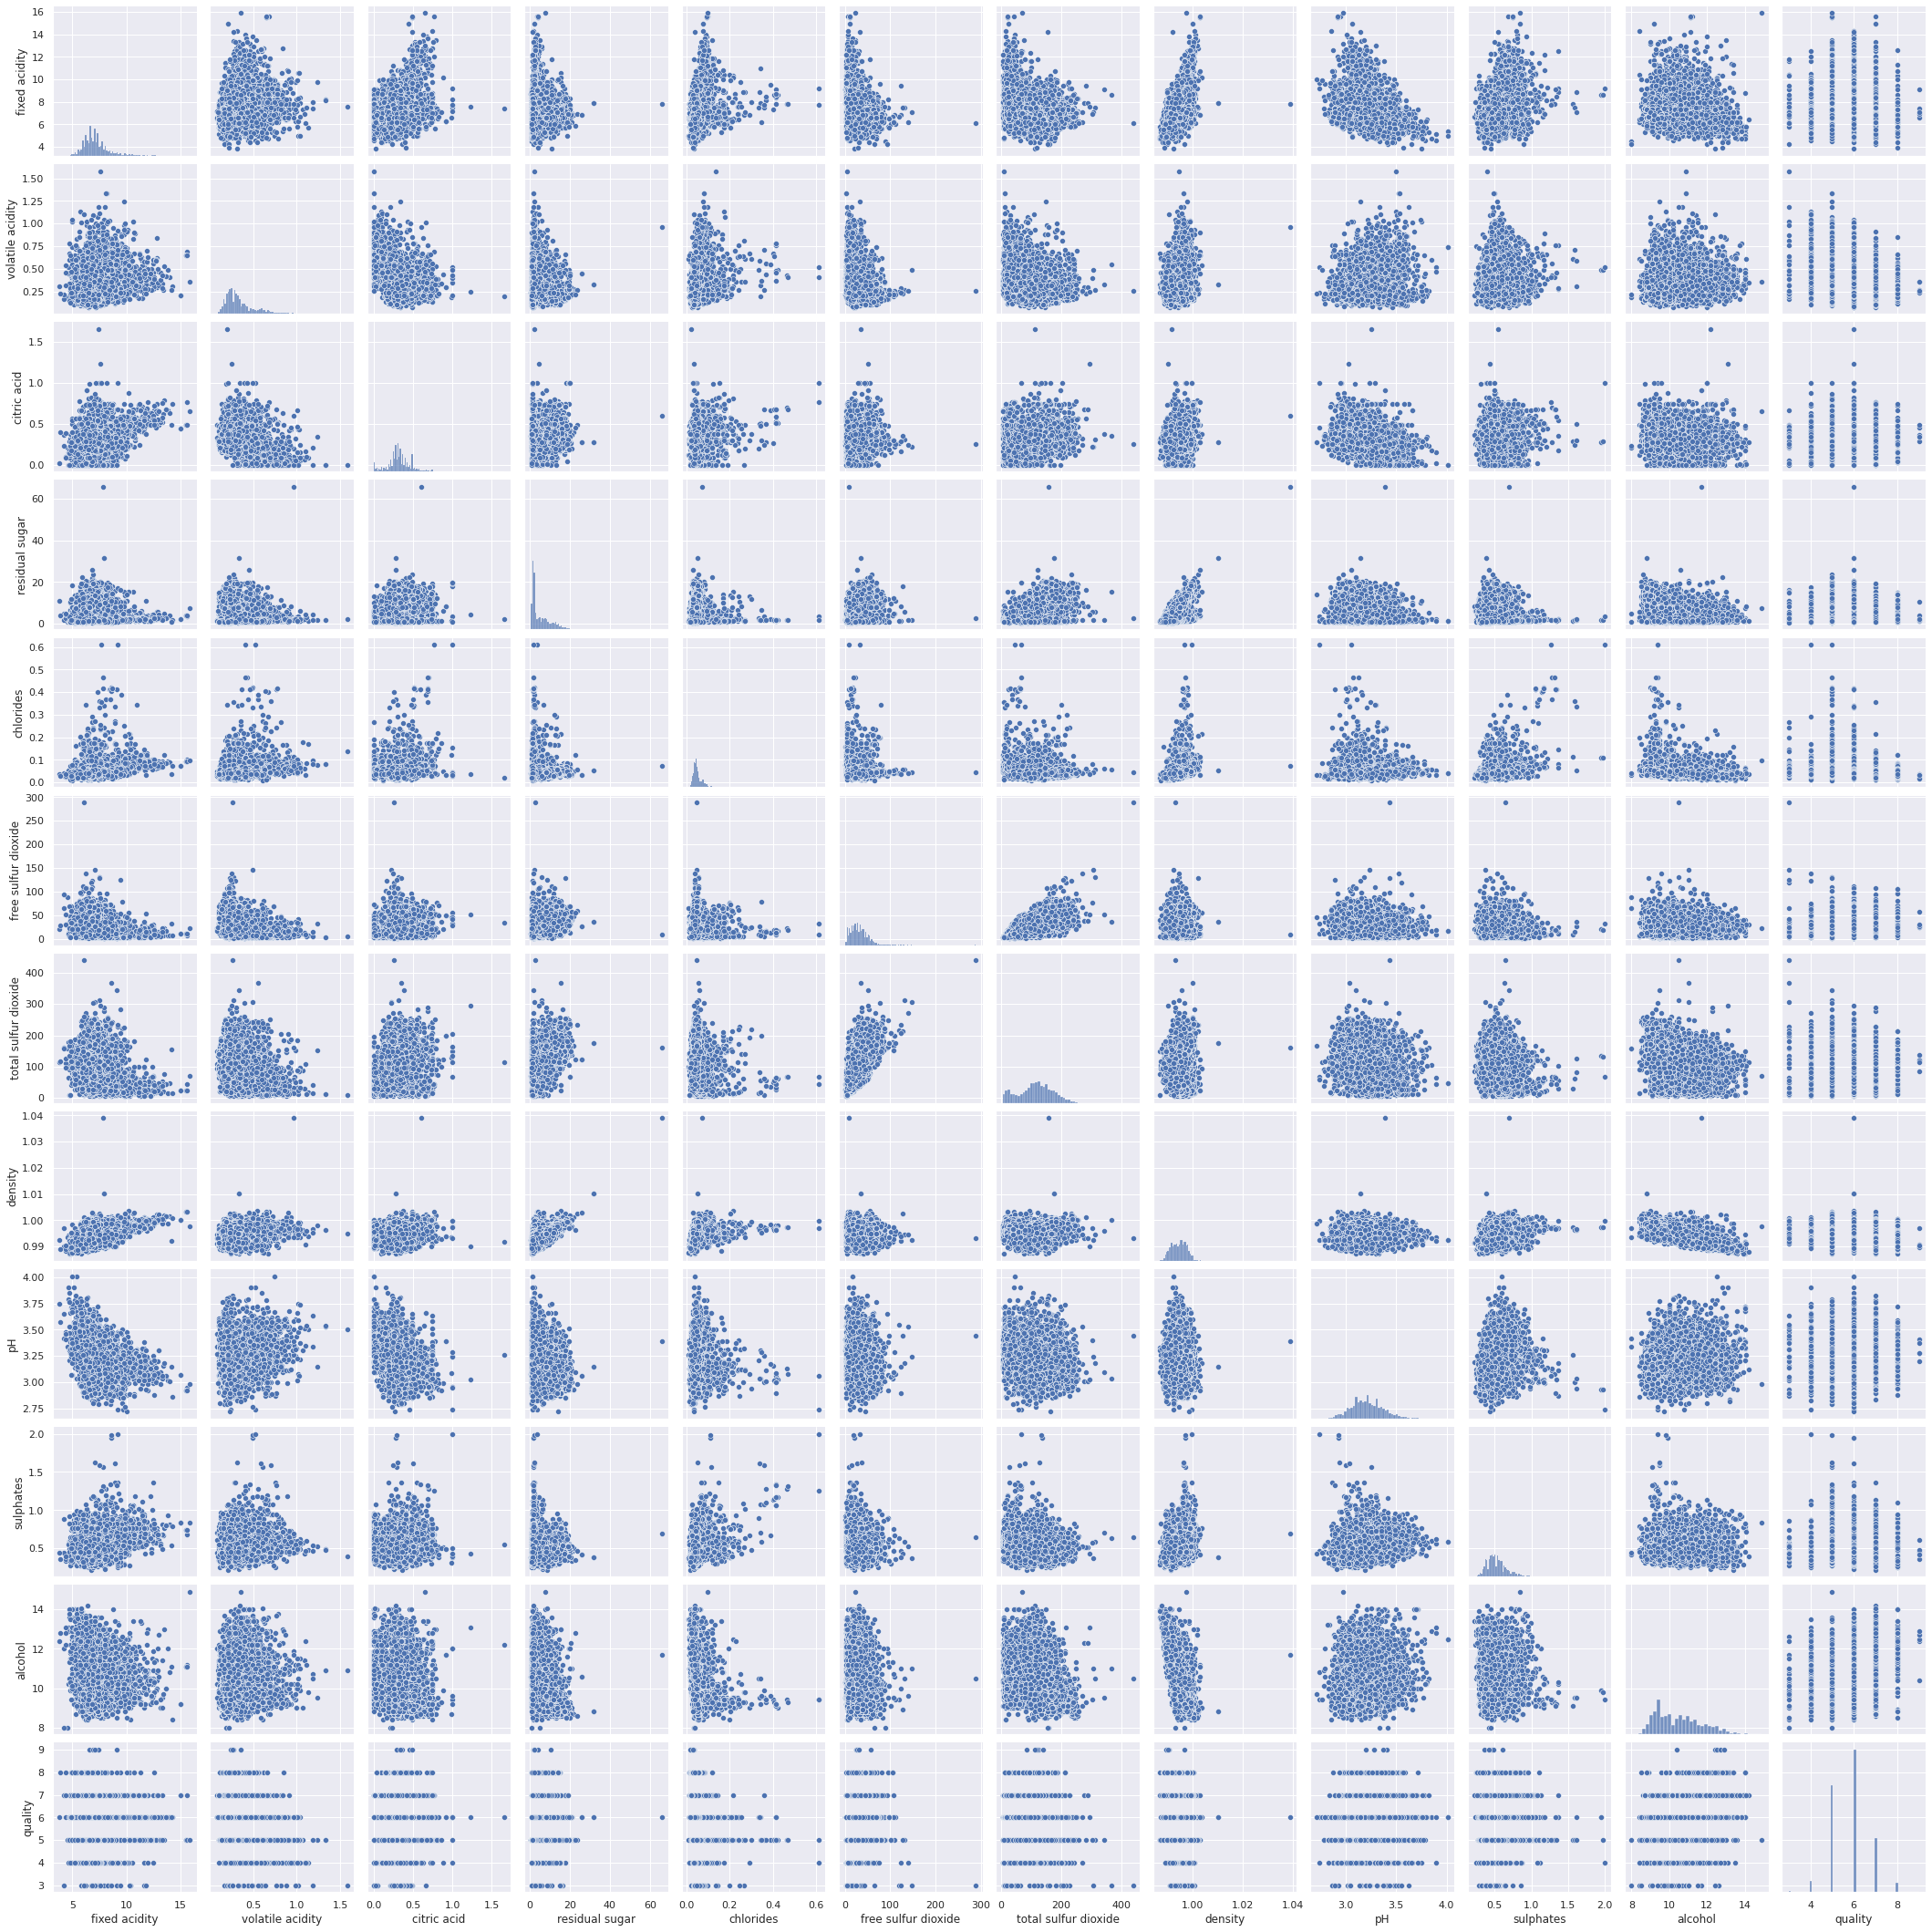

In [15]:
sns.pairplot(total_wine)

### Mapa de calor

<AxesSubplot:>

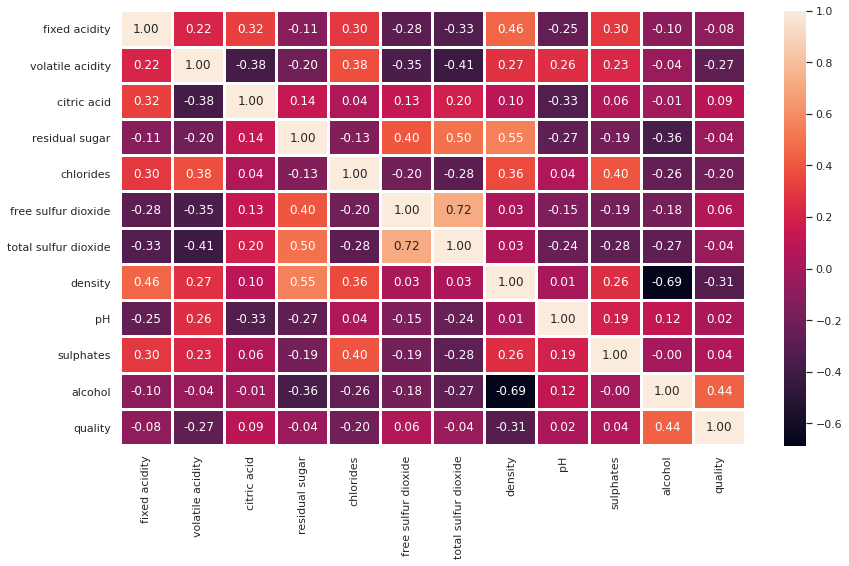

In [17]:
sns.heatmap(total_wine.corr(), annot=True, fmt='.2f', linewidths=2)

### Graficando el alcohol contra la densidad

/home/oscar/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='alcohol', ylabel='Density'>

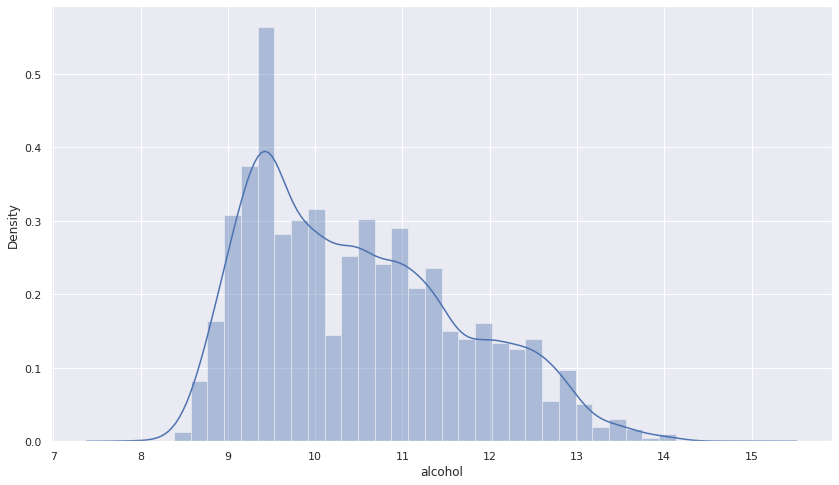

In [20]:
sns.distplot(total_wine['alcohol'])

### Graficando calidad con el alcohol
Significado de la funcion **skew o skewtest**

Para los datos distribuidos normalmente, la asimetría debe ser aproximadamente cero. Para distribuciones continuas unimodales, un valor de asimetría mayor que cero significa que hay más peso en la cola derecha de la distribución. La función **skewtest** se puede utilizar para determinar si el valor de asimetría está lo suficientemente cerca de cero

In [21]:
skew(total_wine['alcohol'])

0.5655871101943215

Por ejemplo en la calidad 5 presenta muchos outlier y fueron provocados por este motivo y por eso propogo el siguiente modelo que mejorar el envasado.

<AxesSubplot:xlabel='quality', ylabel='alcohol'>

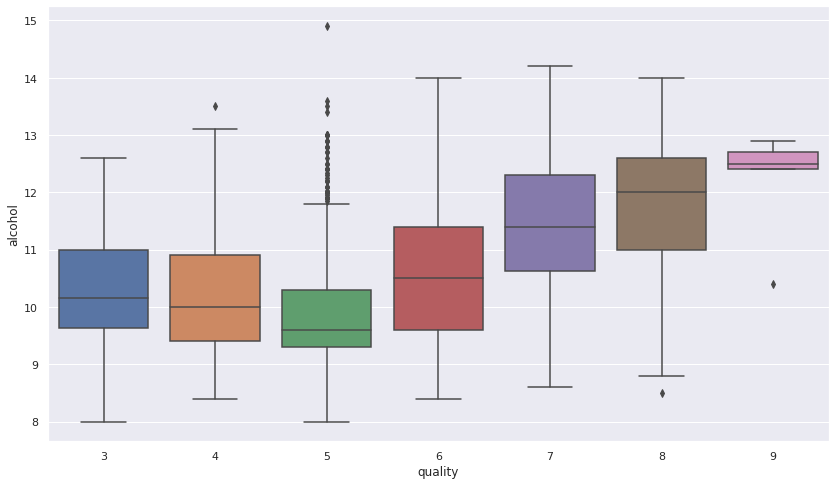

In [22]:
sns.boxplot(x='quality', y='alcohol', data = total_wine)

### Clasificando la calida de los vinos
- Low
- Medium
- High

In [23]:
total_wine['quality_label'] =total_wine['quality'].apply(
    lambda value: ('low' if value <= 5 else 'medium') if value <= 7 else 'high'
)
total_wine['quality_label'] =pd.Categorical(
    total_wine['quality_label'],
    categories=['low', 'medium', 'high']
)

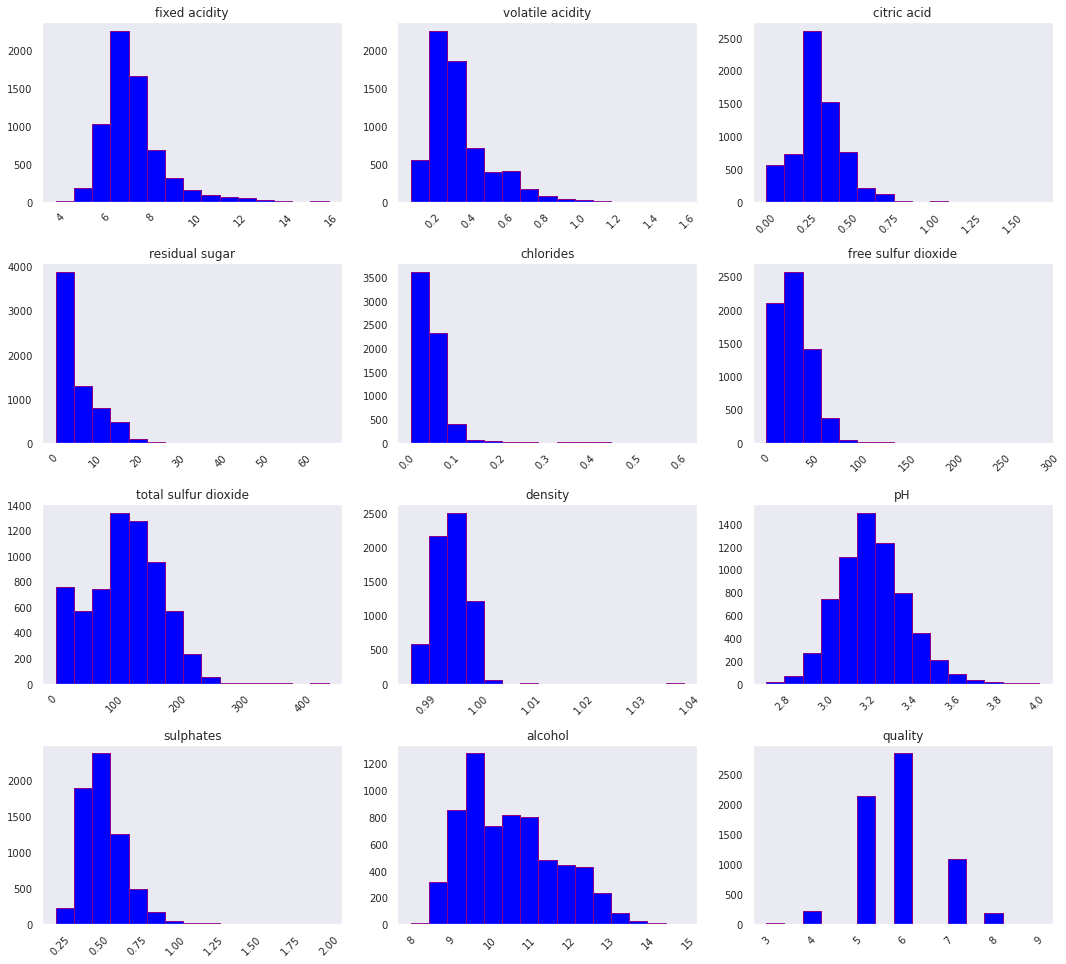

In [26]:
fig = total_wine.hist(bins=15, color='blue', edgecolor='darkmagenta', linewidth=1.0, xlabelsize=10, ylabelsize=10, xrot=45, yrot=0, figsize=(10,9), grid=False)
plt.tight_layout(rect=(0, 0, 1.5, 1.5))

## Modelo de regresion
En este caso se va a usar xxxx, porque queremos entender como se estan agrupando los vinos segun sus calidades


In [28]:
## Analisis de regresion from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier 
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split,cross_validate
from sklearn.preprocessing import MinMaxScaler,StandardScaler,LabelEncoder
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

In [29]:
label_quality = LabelEncoder()
total_wine['quality_label'] = label_quality.fit_transform(total_wine['quality_label'])
total_wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,category,quality_label
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,red,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,red,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,red,2
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,white,2
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,white,1
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,white,2
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white,2


In [36]:
training_set_regresor=total_wine.drop(['category'],axis=1)

x_train,x_test,y_train,y_test=train_test_split(
    training_set_regresor,
    total_wine['quality_label'],
    test_size=0.30,
    random_state=42
)

x_train

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_label
3761,9.9,0.490,0.23,2.40,0.087,19.0,115.0,0.99480,2.77,0.44,9.400000,6,2
3740,7.7,0.280,0.35,15.30,0.056,31.0,117.0,0.99980,3.27,0.50,9.600000,5,1
1359,11.6,0.475,0.40,1.40,0.091,6.0,28.0,0.99704,3.07,0.65,10.033333,6,2
1230,7.7,0.180,0.34,2.70,0.066,15.0,58.0,0.99470,3.37,0.78,11.800000,6,2
4751,7.6,0.250,1.23,4.60,0.035,51.0,294.0,0.99018,3.03,0.43,13.100000,6,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3772,7.6,0.320,0.58,16.75,0.050,43.0,163.0,0.99990,3.15,0.54,9.200000,5,1
5191,5.6,0.280,0.27,3.90,0.043,52.0,158.0,0.99202,3.35,0.44,10.700000,7,2
5226,6.4,0.370,0.20,5.60,0.117,61.0,183.0,0.99459,3.24,0.43,9.500000,5,1
5390,6.5,0.260,0.50,8.00,0.051,46.0,197.0,0.99536,3.18,0.47,9.500000,5,1


### Puntaje final

In [35]:
model_names=['KNearestNeighbors']

acc=[]
eval_acc={}
classification_model=KNeighborsClassifier()
classification_model.fit(x_train,y_train)
pred=classification_model.predict(x_test)
acc.append(accuracy_score(pred,y_test))
eval_acc={'Modelling Algorithm':model_names,'Accuracy':acc} 
eval_acc

{'Modelling Algorithm': ['KNearestNeighbors'],
 'Accuracy': [0.7476923076923077]}